<a href="https://colab.research.google.com/github/adalbertii/modele-NLP/blob/main/Embedding_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np

**Budowanie warstwy Embedding dla słownika składającego się z 10 cyfr**

Bez procesu uczenia

In [54]:
# utworzenie prostego modelu z warstwą Embedding
model = Sequential()
embedding_layer = Embedding(input_dim=10,output_dim=4,input_length=2)
model.add(embedding_layer)
model.compile('adam','mse')

# input_dim - rozmiar słownika
# output_dim - długość wektora dla  każdego słowa
# input_length - maksymalna długość sekwencji

# W powyższym przykładzie ustawiamy 10 jako rozmiar słownictwa, ponieważ będziemy kodować liczby od 0 do 9.
# Chcemy, aby długość wektora słów wynosiła 4, stąd output_dim jest ustawione na 4.
# Długość sekwencji wejściowej do warstwy osadzania będzie wynosić 2 (będziemy podawać na wejściu sieci dwie cyfry)

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2, 4)              40        
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# wydruk wspólczynników wagowych warstwy Embedding
# Poniewaćż nie inicjujemy procesu uczenia wartości wag są losowe

print(model.weights)

[<tf.Variable 'embedding_2/embeddings:0' shape=(10, 4) dtype=float32, numpy=
array([[ 0.0070874 ,  0.01542639, -0.02990096, -0.00173855],
       [ 0.03871619,  0.02744397, -0.00228531, -0.01004197],
       [-0.04073387,  0.04737893, -0.02221308,  0.03183004],
       [ 0.01618054, -0.0470539 ,  0.02320994, -0.01348228],
       [ 0.0445953 ,  0.00771563,  0.01308477, -0.04099916],
       [ 0.01475361,  0.02525814, -0.01983148, -0.02798603],
       [-0.01811845,  0.01470834,  0.00140035, -0.04337794],
       [ 0.04006534,  0.01242418,  0.03421808, -0.01974478],
       [ 0.00072106,  0.03471018, -0.01679941, -0.00634446],
       [-0.04031066,  0.01384619,  0.0187091 ,  0.01152953]],
      dtype=float32)>]


Te wagi są reprezentacjami wektorowymi słów w słownictwie.
Tabela wag o rozmiarze 10 x 4, dla słów od 0 do 9.


In [57]:
# Teraz przekażmy przykładowe dane wejściowe do  modelu i zobaczmy wyniki.
input_data = np.array([[1,2]])
pred = model.predict(input_data)
print("-----------------------------------------------------------------")
print("Dane wejściowe modelu:", input_data.shape)

print("-----------------------------------------------------------------")
print("")
print("Wartości wag warstwy Embedding dla podanych na wejsciu danych:")
print(pred)

1/1 [==============================] - 0s 243ms/step
-----------------------------------------------------------------
Dane wejściowe modelu: (1, 2)
-----------------------------------------------------------------

Wartości wag warstwy Embedding dla podanych na wejsciu danych:
[[[ 0.03871619  0.02744397 -0.00228531 -0.01004197]
  [-0.04073387  0.04737893 -0.02221308  0.03183004]]]


Jak widać, każde słowo (1 i 2) jest reprezentowane przez wektor o długości 4.

W tym przykładzie nie wytrenowaliśmy warstwy osadzania. Wagi przypisane do wektorów słów są inicjowane losowo.

**Klasyfikacja recenzji restauracji**


Tok działań:    
*   Tokenizacja zdań na słowa.
*   Utwórzenie zakodowanego wektor "one-hot" dla każdego słowa.
*   Użycie funkcji "Padding", w celu ujednolicenia rozmiaru sekekwencji wejściowej modelu (upewnienia się, że wszystkie sekwencje mają tę samą długość).
*   Przekazanie wypełnionych sekwencji jako danych wejściowwych do warstwy Embedding.
*   Spłaszczennie danych do wktora i zastostosowanie  warstwę Dense, aby przewidywać etykietę

    
    

In [58]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense

Aby to uprościć, użyjemy łącznie tylko  10 przykładowych, prostych  recenzji. Połowa z nich jest pozytywna, reprezentowana przez 0, a druga połowa jest negatywna, reprezentowana przez 1.

In [59]:
#definicja 10 recencji
reviews =[
          'Never coming back!',
          'horrible service',
          'rude waitress',
          'cold food',
          'horrible food!',
          'awesome',
          'awesome services!',
          'rocks',
          'poor work',
          'couldn\'t have done better'
]

#definicja etykiet (1-negatywane, 0-pozytywna)
labels = array([1,1,1,1,1,0,0,0,0,0])

Przyjmiemy rozmiar słownictwa jako 50 i zakodujemy słowa za pomocą funkcji "one_hot" z Keras.

In [60]:
Vocab_size = 50
encoded_reviews = [one_hot(d,Vocab_size) for d in reviews]
print(f'encoded reviews: {encoded_reviews}')

encoded reviews: [[36, 48, 19], [36, 48], [8, 4], [40, 49], [36, 49], [12], [12, 9], [48], [17, 45], [10, 28, 7, 10]]


Widać, że długość każdej zakodowanej recenzji jest równa liczbie słów w tej recenzji. Keras one_hot  konwertuje każde słowo na zakodowany indeks one-hot.

Teraz musimy zastosować "padding", aby wszystkie zakodowane recenzje miały tę samą długość.

Zdefiniujmy 4 jako maksymalną długość i wypełnijmy zakodowane wektory zerami na końcu.

In [61]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)

#Wypełnione i zakodowane recenzje będą wyglądać następująco:

[[36 48 19  0]
 [36 48  0  0]
 [ 8  4  0  0]
 [40 49  0  0]
 [36 49  0  0]
 [12  0  0  0]
 [12  9  0  0]
 [48  0  0  0]
 [17 45  0  0]
 [10 28  7 10]]


Po utworzeniu ujednoliconej pod względem rozmiaru, zakodowanje  reprezentacji recenzji, jesteśmy gotowi do przekazania jej jako danych wejściowych do warstwy osadzania.

W poniższym fragmencie kodu tworzymy prosty model Keras.

Ustalimy arbitralnie długość osadzonych wektorów dla każdego słowa na 8, a długość wejściowa będzie maksymalną długością, którą już zdefiniowaliśmy jako 4.

In [84]:
embedding_layer = Embedding(input_dim=Vocab_size,output_dim=8,input_length=max_length, name="wmi-embedding")

In [85]:
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [86]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 wmi-embedding (Embedding)   (None, 4, 8)              400       
                                                                 
 flatten_8 (Flatten)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [87]:
# współczynniki wagowe przed procesem uczenia

weights = model.get_layer('wmi-embedding').get_weights()[0]
weights

array([[ 0.00358281, -0.03014585, -0.03511206, -0.04963252,  0.04356351,
        -0.03387401,  0.01025762, -0.04581777],
       [ 0.0417138 ,  0.01123955, -0.01737588, -0.03280519,  0.04588029,
        -0.00351821,  0.03554149,  0.04691703],
       [-0.0214067 ,  0.01541693,  0.03646597,  0.03071595,  0.04026718,
        -0.04059844,  0.00501544,  0.00899556],
       [-0.01651039, -0.03761987,  0.00359764,  0.02344361, -0.02609607,
        -0.0022776 ,  0.00073147,  0.03229395],
       [-0.00483123,  0.01679428,  0.01294551,  0.02385231, -0.04411525,
         0.03806443, -0.03634312, -0.01387234],
       [ 0.02511512, -0.04346913,  0.04522497,  0.04209776,  0.04661024,
         0.01686683,  0.01317214, -0.01263122],
       [ 0.04619172, -0.01010969,  0.01751605,  0.04461259, -0.03740158,
         0.00170625, -0.01517193, -0.00234194],
       [-0.0399608 ,  0.01731069,  0.01192365,  0.00116571, -0.00273571,
         0.04260765, -0.04947268,  0.04886539],
       [ 0.04154228, -0.00769194

In [88]:
em_before = embedding_layer.get_weights()[0][0]

**Proces uczenia zdefiniowanego modelu**

In [89]:
history = model.fit(padded_reviews,labels,epochs=30,verbose=1)

Epoch 1/30
1/1 [==============================] - 1s 648ms/step - loss: 0.6979 - accuracy: 0.3000
Epoch 2/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6957 - accuracy: 0.3000
Epoch 3/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6936 - accuracy: 0.4000
Epoch 4/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6895 - accuracy: 0.6000
Epoch 6/30
1/1 [==============================] - 0s 18ms/step - loss: 0.6874 - accuracy: 0.7000
Epoch 7/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6853 - accuracy: 0.8000
Epoch 8/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6832 - accuracy: 0.9000
Epoch 9/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6812 - accuracy: 0.9000
Epoch 10/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6791 - accuracy: 0.9000
Epoch 11/30
1/1 [===========

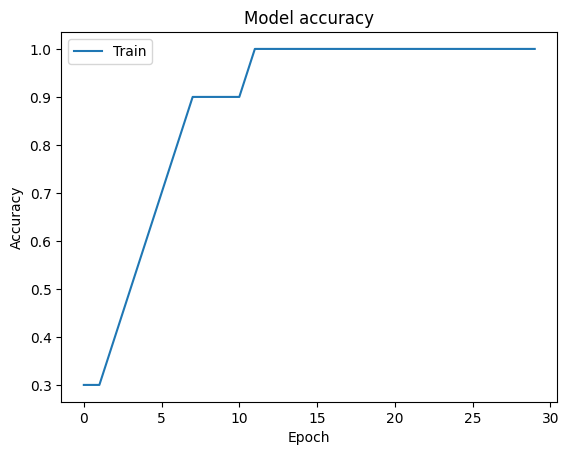

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Po zakończeniu treningu warstwa osadzania nauczyła się wag, które są niczym innym jak reprezentacjami wektorowymi każdego słowa. Sprawdźmy kształt macierzy wag.

In [91]:
print(embedding_layer.get_weights()[0].shape)

(50, 8)


In [92]:
# Jeśli sprawdzimy osadzenie dla pierwszego słowa, otrzymamy następujący wektor.
em_after = embedding_layer.get_weights()[0][0]


In [93]:
# współczynniki wagowe po procesie uczenia
weights = model.get_layer('wmi-embedding').get_weights()[0]
weights

array([[-1.41706038e-03, -2.24239193e-04, -5.13517391e-03,
        -7.96323642e-02,  7.38082454e-02, -6.39319345e-02,
         4.04599383e-02, -1.63888410e-02],
       [ 4.17138003e-02,  1.12395510e-02, -1.73758753e-02,
        -3.28051932e-02,  4.58802916e-02, -3.51821259e-03,
         3.55414860e-02,  4.69170325e-02],
       [-2.14066990e-02,  1.54169314e-02,  3.64659689e-02,
         3.07159461e-02,  4.02671807e-02, -4.05984409e-02,
         5.01544401e-03,  8.99555534e-03],
       [-1.65103897e-02, -3.76198664e-02,  3.59763950e-03,
         2.34436132e-02, -2.60960702e-02, -2.27760151e-03,
         7.31468201e-04,  3.22939493e-02],
       [-3.43755558e-02, -1.28784254e-02, -1.66873615e-02,
         5.39252646e-02, -7.47383088e-02,  6.76676631e-02,
        -6.63801208e-02, -4.34279367e-02],
       [ 2.51151212e-02, -4.34691310e-02,  4.52249683e-02,
         4.20977585e-02,  4.66102399e-02,  1.68668292e-02,
         1.31721385e-02, -1.26312152e-02],
       [ 4.61917184e-02, -1.010968

In [94]:
em_before

array([ 0.00358281, -0.03014585, -0.03511206, -0.04963252,  0.04356351,
       -0.03387401,  0.01025762, -0.04581777], dtype=float32)

In [95]:
em_after

array([-0.00141706, -0.00022424, -0.00513517, -0.07963236,  0.07380825,
       -0.06393193,  0.04045994, -0.01638884], dtype=float32)

**Przygotowanie danych do prezentacji współczynników wagowych wyuczonej warstwy Embedding  na platformie Embedding Projector**

In [69]:
# definicja funkcji standaryzującej

import tensorflow as tf

def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)

  return lowercase


In [70]:
from tensorflow.keras.layers import TextVectorization

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=Vocab_size,
    output_mode='int',
    output_sequence_length=max_length)



In [71]:
vectorize_layer.adapt(reviews)

In [72]:
vocab = vectorize_layer.get_vocabulary()


In [73]:
vocab

['',
 '[UNK]',
 'horrible',
 'awesome',
 'work',
 'waitress',
 'services!',
 'service',
 'rude',
 'rocks',
 'poor',
 'never',
 'have',
 'food!',
 'food',
 'done',
 "couldn't",
 'coming',
 'cold',
 'better',
 'back!']

In [ ]:
import io
import os
out_v = io.open('/content/drive/MyDrive/dane/embeddings/vectors01.tsv', 'w', encoding='utf-8')
out_m = io.open('/content/drive/MyDrive/dane/embeddings/metadata01.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # pomijając 0, bo jest to wypełnienie.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

 http://projector.tensorflow.org/?_gl=1*rggcgk*_ga*NzAyNjA5OTg4LjE2OTQ1MDIxMDc.*_ga_W0YLR4190T*MTcwMDgyODU5Ny44LjEuMTcwMDgzMDA3MS4wLjAuMA..
